<a href="https://colab.research.google.com/github/TassyaRM/MachineLearning_TK-44-G4_/blob/main/Mgg8/Support_Vector_Regression_Tassya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengambilan Data dari API Kaggle
---


In [ ]:
#Install modul kaggle
!pip install kaggle

In [ ]:
from google.colab import files

# Upload file kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tassyaramadhanti","key":"0100ff86eefed89e942ccf669125b605"}'}

In [ ]:
# Membuat direktori Kaggle
!mkdir -p ~/.kaggle

# Pindahkan file kaggle.json ke direktori Kaggle
!mv kaggle.json ~/.kaggle/

In [ ]:
# Mencari dataset yang tersedia di kaggle
!kaggle datasets list -s "Watermelon price prediction from weight"

ref                                             title                                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------  ---------------------------------------  ----  -------------------  -------------  ---------  ---------------  
man526/watermelon-price-prediction-from-weight  Watermelon price prediction from weight  223B  2023-11-02 17:15:43            313         12  1.0              


In [ ]:
# Download dan ekstrak dataset, dimana nantinya akan satu direktori dengan notebook ini
!kaggle datasets download man526/watermelon-price-prediction-from-weight --unzip

  0% 0.00/223 [00:00<?, ?B/s]
100% 223/223 [00:00<00:00, 509kB/s]


# <center>Support Vector Regression (SVR)</center>
---
SVR memberi fleksibilitas untuk menentukan seberapa besar kesalahan yang dapat diterima dalam model dan akan menemukan garis yang sesuai (atau hyperplane dalam dimensi yang lebih tinggi) agar sesuai dengan data.
Berbeda dengan Least Square biasa, fungsi tujuan SVR adalah untuk meminimalkan koefisien — lebih khusus lagi, l2-norm vektor koefisien — bukan squared error.


In [ ]:
# Import library
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("melon.csv")

# melihat dataset
df.head()

,Weight,Price
0,1,50
1,2,100
2,3,140
3,4,180
4,5,220


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  10 non-null     int64
 1   Price   10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [ ]:
# Menampilkan jumlah nilai yang hilang untuk setiap kolom
df.isnull().sum()

Weight    0
Price     0
dtype: int64

In [ ]:
# Pisahkan fitur (X) dan target (y)
X = df['Weight'].values.reshape(-1, 1)
y = df['Price'].values.reshape(-1, 1)

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standarisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model SVR dengan hyperparameter tertentu, disini saya menggunakan parameter C, gamma, dan kernel
svr_model = SVR(C=1000, epsilon=0.1, kernel='linear')

# Melatih model SVR
svr_model.fit(X_train, y_train.ravel())  # Use .ravel() to convert to a 1D array

# Melakukan prediksi pada data uji
y_pred = svr_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.010000000001121521


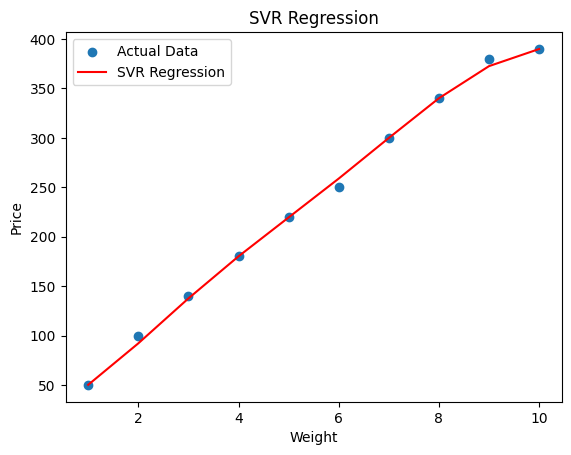

In [ ]:
# Memvisualisasikan model
plt.scatter(X, y, label='Actual Data')
plt.plot(X, svr_model.predict(X), color='red', label='SVR Regression')

# Label sumbu
plt.xlabel('Weight')
plt.ylabel('Price')

# Menambahkan judul
plt.title('SVR Regression')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()